<a href="https://colab.research.google.com/github/baaaaamji/asian-hate-crime/blob/main/%EC%95%A0%ED%8B%80%EB%9E%9C%ED%83%80_%EC%B4%9D%EA%B2%A9%EC%82%AC%EA%B1%B4_asian_hate_%ED%82%A4%EC%9B%8C%EB%93%9C_%EB%B6%84%EC%84%9D_2nd_period.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Textblob &> /dev/null
!pip install -U tomotopy &> /dev/null
!pip install -U pyldavis==2.1.2 &> /dev/null
!pip install -U gensim &> /dev/null

In [ ]:
import pandas as pd
import re
import pprint as pp

import nltk
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob, Word

nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.font_manager as fm

pd.options.display.max_colwidth = -1

%matplotlib inline 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/Innovation2021/LDA/NYT2ND.csv', encoding='utf-8')

DF.head()

Content  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Allwords
0  LADY BIRD JOHNSON Hiding in Plain SightBy Julia SweigWe should all be so lucky as to have a Claudia Taylor, a.k.a. Lady Bird Johnson, in our lives, someone with the self-effacing graciousness of a geisha, the political shrewdness of Cleopatra, the intelligence of a Phi Beta Kappa and the caregiving skills of Florence Nightingale. Without someone with the former first lady’s considerable gifts, the expansive yet explosive 36th president, Lyndon B. Johnson, might have found himself far less effective, while, owing mostly to the times, Lady Bird’s own aspirations had to be channeled through his. Maybe this wasn’t so bad, given that L.B.J. was, from November 1963 to January 1969, the most powerful man on the planet.Reading between the lines of Julia Sweig’s extensive, engaging new biography, “Lady Bird Johnson: Hiding in Plain Sight,” it is possible to see her as the perfect bridge to the modern first lady — not the visionless helpmeet of a Nancy Reagan, but not quite the fully realized, independent role models of Hillary Clinton or Michelle Obama. To paraphrase the former Texas Governor Ann Richards, Lady Bird did everything more recent first ladies did, but “backwards and in high heels.”During Johnson’s term and after, many viewed Lady Bird as a saccharine Southern belle who cared solely about planting bluebonnets along Texas highways — an im

In [ ]:
print(len(DF))

CONTENT = DF['Content']

527


In [ ]:
POS = ['NN','NNP']

stop_words = stopwords.words('english')
stops = ['percent', 'time', 'group', 'rate', 'place', 'number', 'thing', 'dollar', 'decade', 'area', 'point', 'example', 'said', 'line', 'step', 'side', 'wednesday', 'april', 'year', 'Year', 'com','day','month','other']
stop_words.extend(stops)
stop_words = set(stop_words)

def TB_lemmatization(texts):
  lemma_all = []
  words = []
  for doc in texts:
        doc = " ".join([Word(word).lemmatize("n") for word in doc.split()])
        doc = TextBlob(doc)  

        for word, tag in doc.tags:
            if(len(word) < 2 or word.lower() in stop_words):
                continue
            if tag in POS:
                words.append(word)
        
        words = " ".join(words).lower()
        lemma_all.append(words)
        words = []  
        
        return lemma_all

CONTENT_PREP = TB_lemmatization(DF['Content'])             

In [ ]:
CONTENT_PREP[0]

'lady bird johnson hiding plain sightby julia sweigwe claudia taylor a.k.a bird johnson someone graciousness geisha shrewdness cleopatra intelligence phi beta kappa caregiving skill florence nightingale someone lady president lyndon b. johnson lady bird aspiration l.b.j november january man planet.reading julia sweig biography lady bird johnson hiding plain sight bridge lady helpmeet nancy reagan role model hillary clinton michelle obama texas governor ann richards lady bird everything lady heels. johnson term lady bird southern belle bluebonnet texas highway image new york times book critic christopher lehmann-haupt edition lady bird white house diary pile motionless material. woman smoke screen self-deprecation lady bird persona story sweig book revelation husband inequality decline america city conservation quality health life power diary leverage white house. reader sweig book oh lady bird johnson book caro mold lady bird tape transcript white house diary history america johnson re

Adding 'Allwords' as New Variable into Data

In [ ]:
Allwords = DF['Allwords']

DF.head()

Content  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Allwords
0  LADY BIRD JOHNSON Hiding in Plain SightBy Julia SweigWe should all be so lucky as to have a Claudia Taylor, a.k.a. Lady Bird Johnson, in our lives, someone with the self-effacing graciousness of a geisha, the political shrewdness of Cleopatra, the intelligence of a Phi Beta Kappa and the caregiving skills of Florence Nightingale. Without someone with the former first lady’s considerable gifts, the expansive yet explosive 36th president, Lyndon B. Johnson, might have found himself far less effective, while, owing mostly to the times, Lady Bird’s own aspirations had to be channeled through his. Maybe this wasn’t so bad, given that L.B.J. was, from November 1963 to January 1969, the most powerful man on the planet.Reading between the lines of Julia Sweig’s extensive, engaging new biography, “Lady Bird Johnson: Hiding in Plain Sight,” it is possible to see her as the perfect bridge to the modern first lady — not the visionless helpmeet of a Nancy Reagan, but not quite the fully realized, independent role models of Hillary Clinton or Michelle Obama. To paraphrase the former Texas Governor Ann Richards, Lady Bird did everything more recent first ladies did, but “backwards and in high heels.”During Johnson’s term and after, many viewed Lady Bird as a saccharine Southern belle who cared solely about planting bluebonnets along Texas highways — an im

Adding 'Allwords' as New Variable into Data

In [ ]:
DF.to_csv('/content/drive/MyDrive/Innovation2021/LDA/NYT2ND2.csv', encoding = 'utf-8-sig', 
          index_label = False, index = False)

In [ ]:
vec = CountVectorizer().fit(CONTENT_PREP)
bow = vec.transform(CONTENT_PREP)

sum_words = bow.sum(axis=0)
sum_words.shape[1]

240

In [ ]:
words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
words_frequ = sorted(words_freq, key = lambda x: x[1], reverse=True)
for word, freq in words_freq[0:100]:
  print(word, freq)

lady 23
bird 24
johnson 12
hiding 2
plain 2
sightby 1
julia 2
sweigwe 1
claudia 1
taylor 1
someone 3
graciousness 1
geisha 1
shrewdness 1
cleopatra 1
intelligence 1
phi 1
beta 1
kappa 1
caregiving 1
skill 1
florence 1
nightingale 1
president 1
lyndon 4
aspiration 1
november 1
january 1
man 1
planet 1
reading 1
sweig 9
biography 3
sight 1
bridge 1
helpmeet 1
nancy 1
reagan 1
role 1
model 1
hillary 1
clinton 1
michelle 1
obama 1
texas 3
governor 1
ann 1
richards 1
everything 1
heels 1
term 1
southern 1
belle 1
bluebonnet 1
highway 2
image 1
new 1
york 1
times 1
book 8
critic 1
christopher 1
lehmann 1
haupt 1
edition 1
white 4
house 4
diary 4
pile 1
motionless 1
material 1
woman 1
smoke 1
screen 1
self 2
deprecation 1
persona 1
story 1
revelation 1
husband 1
inequality 1
decline 1
america 2
city 2
conservation 1
quality 1
health 2
life 3
power 1
leverage 1
reader 2
oh 1
caro 1
mold 1
tape 1
transcript 1
history 2
decision 1
impression 1
period 1


In [ ]:
import pandas as pd
import re
import numpy as np
import tomotopy as tp
import collections

import gensim
import pyLDAvis

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.font_manager as fm

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecat

In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/Innovation2021/LDA/NYT2ND.csv', encoding='utf-8')

DF.head()

Content  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Allwords
0  LADY BIRD JOHNSON Hiding in Plain SightBy Julia SweigWe should all be so lucky as to have a Claudia Taylor, a.k.a. Lady Bird Johnson, in our lives, someone with the self-effacing graciousness of a geisha, the political shrewdness of Cleopatra, the intelligence of a Phi Beta Kappa and the caregiving skills of Florence Nightingale. Without someone with the former first lady’s considerable gifts, the expansive yet explosive 36th president, Lyndon B. Johnson, might have found himself far less effective, while, owing mostly to the times, Lady Bird’s own aspirations had to be channeled through his. Maybe this wasn’t so bad, given that L.B.J. was, from November 1963 to January 1969, the most powerful man on the planet.Reading between the lines of Julia Sweig’s extensive, engaging new biography, “Lady Bird Johnson: Hiding in Plain Sight,” it is possible to see her as the perfect bridge to the modern first lady — not the visionless helpmeet of a Nancy Reagan, but not quite the fully realized, independent role models of Hillary Clinton or Michelle Obama. To paraphrase the former Texas Governor Ann Richards, Lady Bird did everything more recent first ladies did, but “backwards and in high heels.”During Johnson’s term and after, many viewed Lady Bird as a saccharine Southern belle who cared solely about planting bluebonnets along Texas highways — an im

In [ ]:
def get_coherence(model, coherence=None, topn=None, processes=None):

  topics = []
  for k in range(model.k):
    word_probs = model.get_topic_words(k, topn)
    topics.append([word for word, prob in word_probs])
  
  texts = []
  corpus =[]
  for doc in model.docs:
    words = [model.vocabs[token_id] for token_id in doc.words]
    texts.append(words)
    freqs = list(collections.Counter(doc.words).items())
    corpus.append(freqs)

  id2word = dict(enumerate(model.vocabs))
  dictionary = gensim.corpora.dictionary.Dictionary.from_corpus(corpus, id2word)

  cm = gensim.models.coherencemodel.CoherenceModel(
      topics=topics,
      texts=texts,
      corpus=corpus,
      dictionary=dictionary,
      coherence=coherence,
      topn=topn,
      processes=processes,
  )

  return cm.get_coherence()

In [ ]:
def compute_coherence_values(doc, start, limit, step):
    for i in range(start, limit, step):
        mdl = tp.LDAModel(k=i)
        for text in doc:
            token = text.strip().split()
            if token:
                mdl.add_doc(token)

        mdl.train(iter=100, workers=0)
        coherence_value = get_coherence(mdl, coherence='c_v', topn=10, processes=10)

        print('Topic: {}\tLog-likelihood: {}\tPerplexity: {}\tCoherence: {}'\
        .format(
            i,
            mdl.ll_per_word,
            mdl.perplexity,
            coherence_value
            )
        )
        coherence_values.append(coherence_value) 
        perplexities.append(mdl.perplexity)


In [ ]:
DF['Allwords'].replace('', np.nan, inplace=True)
DF.dropna(subset=['Allwords'], inplace=True)

limit = 50
start = 1;
step = 2;

coherence_values = []
perplexities = []

compute_coherence_values(DF['Allwords'], start, limit, step)

Topic: 1	Log-likelihood: -7.615213260157967	Perplexity: 2028.8273806972375	Coherence: 0.4212227780811971
Topic: 3	Log-likelihood: -7.708139637429741	Perplexity: 2226.3964983610426	Coherence: 0.45902273663883203
Topic: 5	Log-likelihood: -7.7233952739466085	Perplexity: 2260.621996174477	Coherence: 0.4832906554621969
Topic: 7	Log-likelihood: -7.769824624178717	Perplexity: 2368.055952178998	Coherence: 0.47792023739601447
Topic: 9	Log-likelihood: -7.733927955182603	Perplexity: 2284.5582421949725	Coherence: 0.4927028854749395
Topic: 11	Log-likelihood: -7.712701554419616	Perplexity: 2236.5763365069583	Coherence: 0.46375382647723523
Topic: 13	Log-likelihood: -7.734198294897883	Perplexity: 2285.175932509059	Coherence: 0.467202678963855
Topic: 15	Log-likelihood: -7.718871673687381	Perplexity: 2250.4189405977118	Coherence: 0.47079865005555815
Topic: 17	Log-likelihood: -7.718480445438816	Perplexity: 2249.5386853386344	Coherence: 0.4755994260636714
Topic: 19	Log-likelihood: -7.68946946012365	Perple

In [ ]:
x = range(start, limit, step)

mdl_check = pd.DataFrame(list(zip(x, perplexities, coherence_values)), columns=['Num Topics', 'Perplexity', 'Coherence'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ec8ca5490>,
      dtype=object)

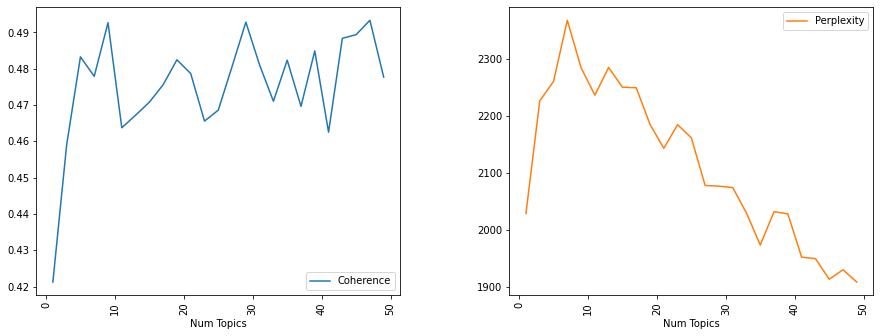

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2) 

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5)

pd.pivot_table(mdl_check, values=["Perplexity", "Coherence"],index="Num Topics")\
    .plot(kind='line', rot=90, ax=ax, subplots=True) 

In [ ]:
mdl = tp.LDAModel(k=15)

for text in DF['Allwords']:
    token = text.strip().split()
    if token:
        mdl.add_doc(token)
mdl.train(iter=100, workers=0)

for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))

Top 10 words of topic #0
[('right', 0.018600231036543846), ('year', 0.01774311624467373), ('issue', 0.017657404765486717), ('election', 0.01628602296113968), ('leader', 0.016114600002765656), ('work', 0.013800391927361488), ('speech', 0.013457546010613441), ('group', 0.013200412504374981), ('power', 0.012943278066813946), ('nation', 0.011057627387344837)]
Top 10 words of topic #1
[('police', 0.034566931426525116), ('people', 0.03300624340772629), ('attack', 0.030694112181663513), ('year', 0.022890672087669373), ('violence', 0.022428246214985847), ('woman', 0.02179240994155407), ('man', 0.02034732885658741), ('victim', 0.015896476805210114), ('community', 0.014162377454340458), ('massage', 0.013584345579147339)]
Top 10 words of topic #2
[('player', 0.025681134313344955), ('season', 0.024438565596938133), ('game', 0.022919869050383568), ('company', 0.02195342816412449), ('team', 0.02015860565006733), ('theater', 0.017535407096147537), ('year', 0.015050268732011318), ('color', 0.014083826

In [ ]:
topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs)
term_frequency = mdl.used_vocab_freq

In [ ]:
prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency,
    mds='mmds'
)

pyLDAvis.display(prepared_data)